Data Analysis
--------------------------------------------------------------------------------------------------------
+ The drug regimen with the most mice participents are Capomulin and Ramicane.
+ The sex distribution of Male : Female are approximately the same with the percentages being 49.4% and 50.6% respectively.
+ Looking at the box plot comparing "Final Tumor Volume (mm3)" amongst the drugs, we can see that Capomulin and Ramicane had the lowest range for the final tumor volume compared to the others. This could mean that these drugs are more efficitive at treating tumors compared to the others. Ramicane has the lowest median compared to Capomulin which could mean that Ramicane is a more efficient drug at reducing tumor volume. In addition, the only drug that had any outliers was Infubinol.
+ Supporting evidence of Capomulin being a very effictive drug is shown through the plot graph of "Tumor Volume (mm3)" vs "Timepoint". The initial tumor size has gone down significantly over time.
+ In addition, there seems to be a significant positive correlation between "Weight(g)" and "Tumor Volume (mm3)" due to the correlation coefficient being 0.84. This means 84% of the model fit the data, especially since higher R-squared values represent smaller differences between the observed data, and the fitted value. 

How to improve analysis:
--------------------------------------------------------------------------------------------------------
+ We can further investigate if sex is a signficiant variable when it comes to drug regimens.
+ There is a limited perspective on the effectiveness of the drug regimen when it comes to the "Weight (g)" vs "Final Tumor Size" since it is only viewed on the individual level not on the drug population level.
+ We could calculate the correlation coefficient for all the drug regimens so we can determine a better conclusion on which drugs has the strongest relationship.

In [2]:

%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_study_merge = pd.merge(study_results,mouse_metadata, on="Mouse ID",how="left")

mouse_study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:

num_mouse=len(mouse_study_merge["Mouse ID"].unique())
print(num_mouse)

249


In [4]:

duplicate_mouse_timepoint = mouse_study_merge[mouse_study_merge.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mouse_timepoint["Mouse ID"].unique()

array(['g989'], dtype=object)

In [5]:

duplicate_mouse_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:

unique_mouse_timepoint = mouse_study_merge[["Mouse ID","Timepoint"]].drop_duplicates(["Mouse ID"])

mouse_study_clean = pd.DataFrame({
    "Mouse ID": unique_mouse_timepoint["Mouse ID"],
    "Timepoint": unique_mouse_timepoint["Timepoint"],
    "Tumor Volume (mm3)": mouse_study_merge["Tumor Volume (mm3)"], 
    "Metastatic Sites": mouse_study_merge["Metastatic Sites"],
    "Drug Regimen": mouse_study_merge["Drug Regimen"],
    "Sex": mouse_study_merge["Sex"],
    "Age_months": mouse_study_merge["Age_months"],
    "Weight (g)": mouse_study_merge["Weight (g)"]
})

mouse_study_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0,Capomulin,Female,9,22
1,f932,0.0,45.0,0,Ketapril,Male,15,29
2,g107,0.0,45.0,0,Ketapril,Female,2,29
3,a457,0.0,45.0,0,Ketapril,Female,11,30
4,c819,0.0,45.0,0,Ketapril,Male,21,25


In [7]:
num_mouse_clean = (mouse_study_clean["Mouse ID"].nunique())

print(num_mouse_clean)

249


In [8]:

drug_tumor_grouping = mouse_study_clean.groupby(["Drug Regimen"])

drug_names = mouse_study_clean["Drug Regimen"].unique()

tumor_mean = (drug_tumor_grouping["Tumor Volume (mm3)"]).mean()
tumor_median = (drug_tumor_grouping["Tumor Volume (mm3)"]).median()
tumor_var = (drug_tumor_grouping["Tumor Volume (mm3)"]).var()
tumor_std = (drug_tumor_grouping["Tumor Volume (mm3)"]).std()
tumor_sem = (drug_tumor_grouping["Tumor Volume (mm3)"]).sem()

statistic_summary_one= pd.DataFrame({
    "Mean Tumor Volume": tumor_mean,
    "Median Tumor Volume": tumor_median,
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Std. Dev.": tumor_std,
    "Tumor Volume Std. Err.": tumor_sem
})
statistic_summary_one

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:

statistic_summary_two=drug_tumor_grouping["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])

table_style=[dict(selector="caption",
                  props=[("text-align","center"),
                         ("font-size","200%"),
                         ("color","black")])]
statistic_summary_two=statistic_summary_two.style.set_caption("Tumor Volume (mm3)").set_table_styles(table_style)
statistic_summary_two

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


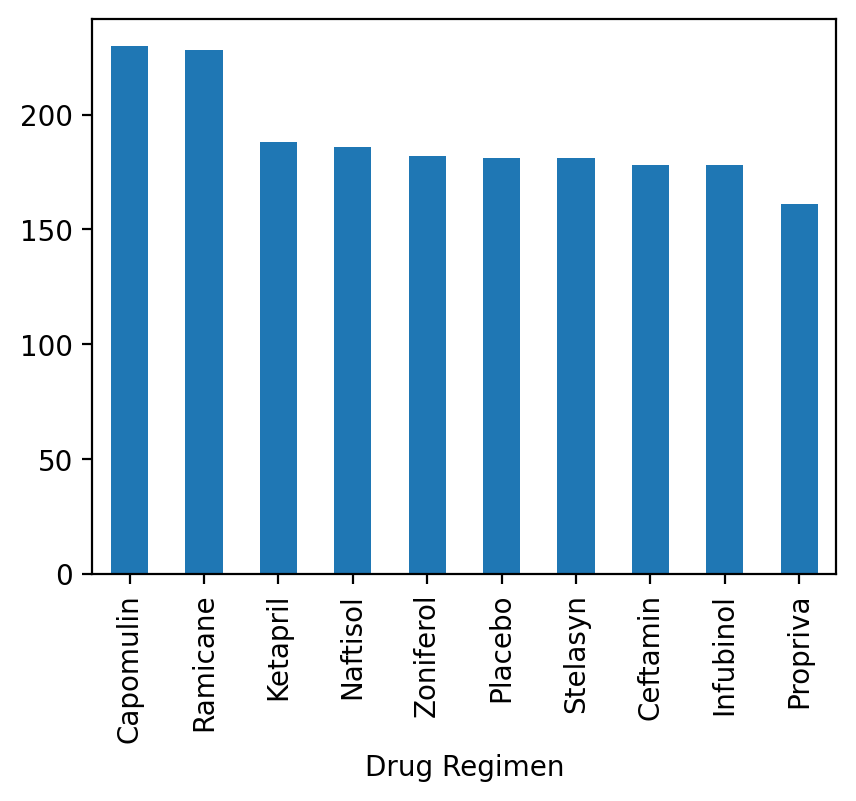

In [10]:

drug_timepoint_data=mouse_study_merge.copy()
drug_timepoint_grouping=drug_timepoint_data.groupby(["Drug Regimen"]).count()["Timepoint"].sort_values(ascending=False)


drug_timepoint_grouping.plot.bar()
plt.savefig("../01_bar_chart_pandas.png")

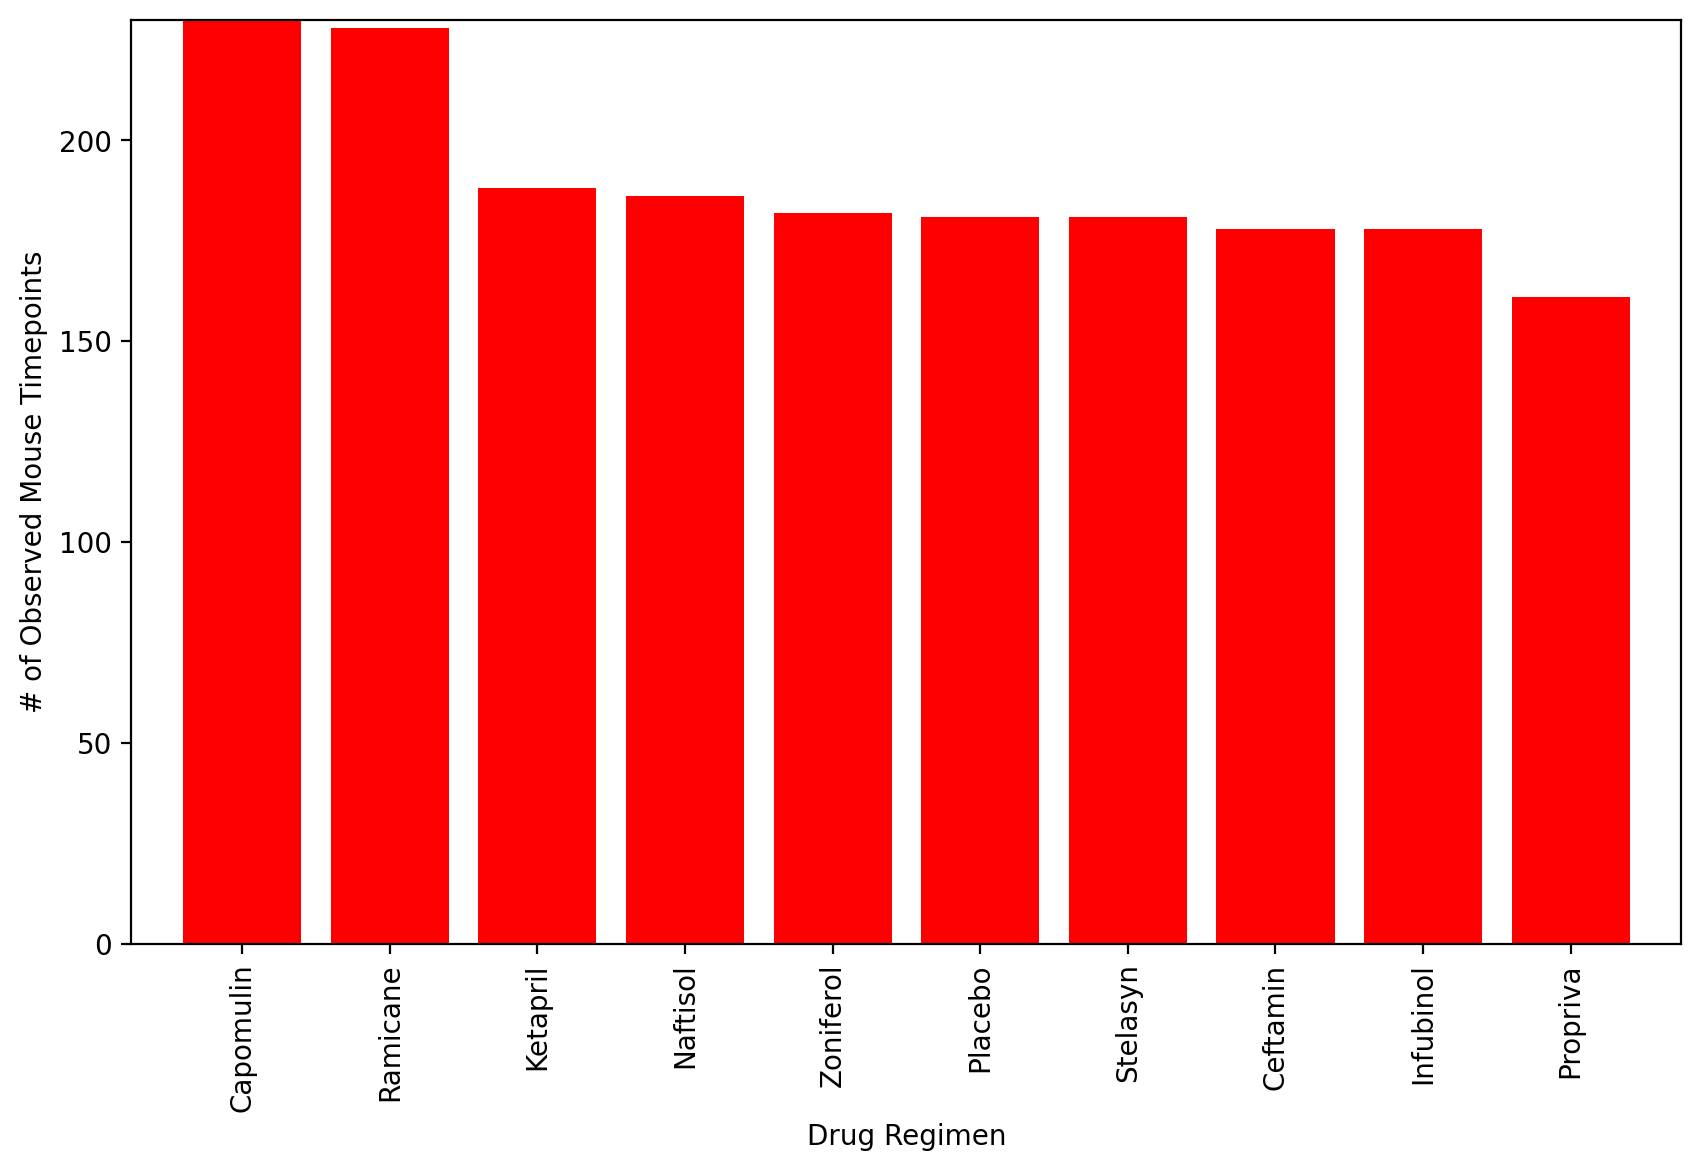

In [11]:

x_axis=np.arange(len(drug_timepoint_grouping))
tick_locations = [x for x in x_axis]


plt.figure(figsize=(10,6))
plt.bar(x_axis,drug_timepoint_grouping,color="red",alpha=1,align="center")
plt.xticks(tick_locations, drug_timepoint_grouping.index.values, rotation="vertical")

plt.xlim(-0.75,len(x_axis)-0.25)
plt.ylim(0, max(drug_timepoint_grouping))
plt.title("")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.savefig("../02_bar_chart_pyplot.png")


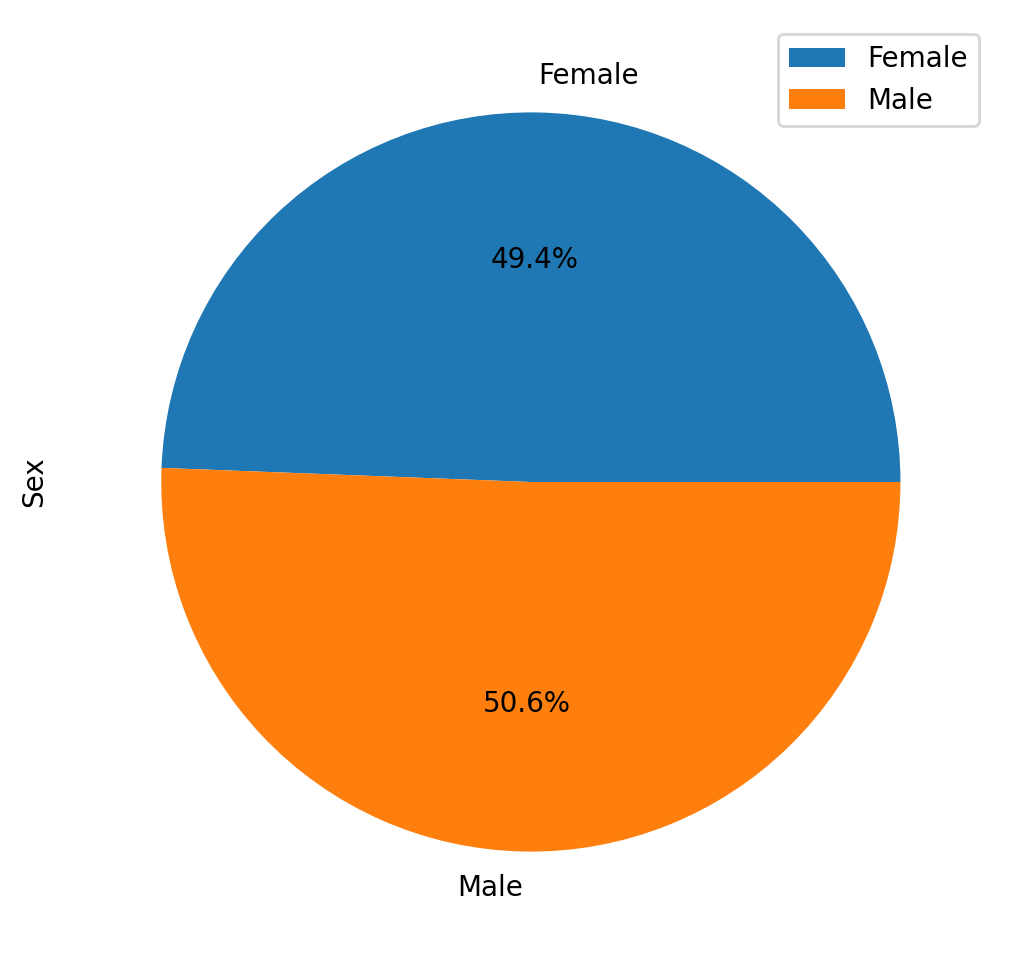

In [12]:

sex_data=mouse_study_merge.copy()
sex_grouping=sex_data.groupby(["Sex"]).count()["Mouse ID"]


sex_pandas_plot=sex_grouping.plot.pie(autopct="%1.1f%%",figsize=(6,6))
sex_pandas_plot.set_xlabel("")
sex_pandas_plot.set_ylabel("Sex")
sex_pandas_plot.legend(["Female","Male"])
plt.savefig("../03_pie_chart_pandas.png")

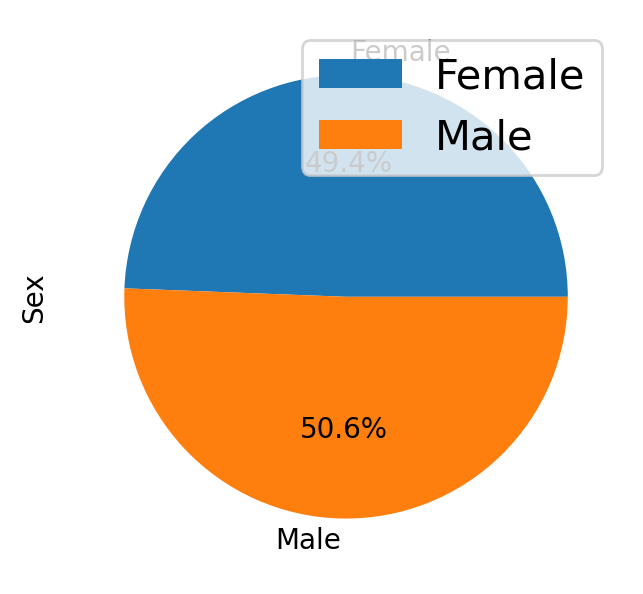

In [13]:
plt.pie(sex_grouping,labels=sex_grouping.index.values,autopct="%1.1f%%") #startangle = 90 rotates the pie graph by 90 degrees
plt.rcParams["figure.figsize"]=(20,15)
plt.legend(["Female","Male"],prop={"size":15})
plt.ylabel("Sex")
plt.savefig("../04_pie_chart_pyplot.png")

In [14]:

mouse_timepoint=mouse_study_clean[mouse_study_clean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

mouse_timepoint=mouse_timepoint.sort_values(by=["Timepoint"],ascending=False)

mouse_study_dataset=mouse_timepoint.merge(mouse_study_merge, on=("Mouse ID","Timepoint"),how="left")

mouse_study_dataset
mouse_study_dataset.rename(columns=
                    {"Tumor Volume (mm3)_x":"Tumor Volume (mm3)",
                    "Drug Regimen_x":"Drug Regimen"})

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites_x,Drug Regimen,Sex_x,Age_months_x,Weight (g)_x,Tumor Volume (mm3)_y,Metastatic Sites_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y
0,b128,0.0,45.000000,0,Capomulin,Female,9,22,45.0,0.0,Capomulin,Female,9.0,22.0
1,w584,0.0,45.000000,0,Infubinol,Male,3,29,45.0,0.0,Infubinol,Male,3.0,29.0
2,t573,0.0,45.000000,0,Ceftamin,Female,15,27,45.0,0.0,Ceftamin,Female,15.0,27.0
3,q483,0.0,45.000000,0,Ceftamin,Male,6,26,45.0,0.0,Ceftamin,Male,6.0,26.0
4,o287,0.0,45.000000,0,Ceftamin,Male,2,28,45.0,0.0,Ceftamin,Male,2.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,NaN,NaN,32.978522,1,Ramicane,Female,7,17,NaN,NaN,NaN,NaN,NaN,NaN
810,NaN,NaN,33.562402,3,Ramicane,Male,10,18,NaN,NaN,NaN,NaN,NaN,NaN
811,NaN,NaN,41.581521,2,Capomulin,Male,12,25,NaN,NaN,NaN,NaN,NaN,NaN
812,NaN,NaN,31.023923,3,Capomulin,Male,18,17,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:

drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

id_mouse = mouse_study_merge.groupby(["Mouse ID"]).max()
id_mouse_reset = id_mouse.reset_index()


id_timepoint_data = id_mouse_reset[["Mouse ID","Timepoint"]].merge(mouse_study_merge, on=["Mouse ID","Timepoint"], how="left")

def id_outliers(drug):
    drug_data=id_timepoint_data.loc[id_timepoint_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    #print(drug_data)
    quart = drug_data.quantile([0.25,0.50,0.75])
    lowerq = quart.min()
    upperq = quart.max()
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers=drug_data.loc[(drug_data<lower_bound)|(drug_data>upper_bound)]

    tumor_vol_data.append(outliers)
    return drug_data
 
tumor_vol_data=[]
    
for x in range(0,4):
    (id_outliers(drug_list[x]))
    

In [16]:
print(tumor_vol_data)

[Series([], Name: Tumor Volume (mm3), dtype: float64), Series([], Name: Tumor Volume (mm3), dtype: float64), 31    36.321346
Name: Tumor Volume (mm3), dtype: float64, Series([], Name: Tumor Volume (mm3), dtype: float64)]


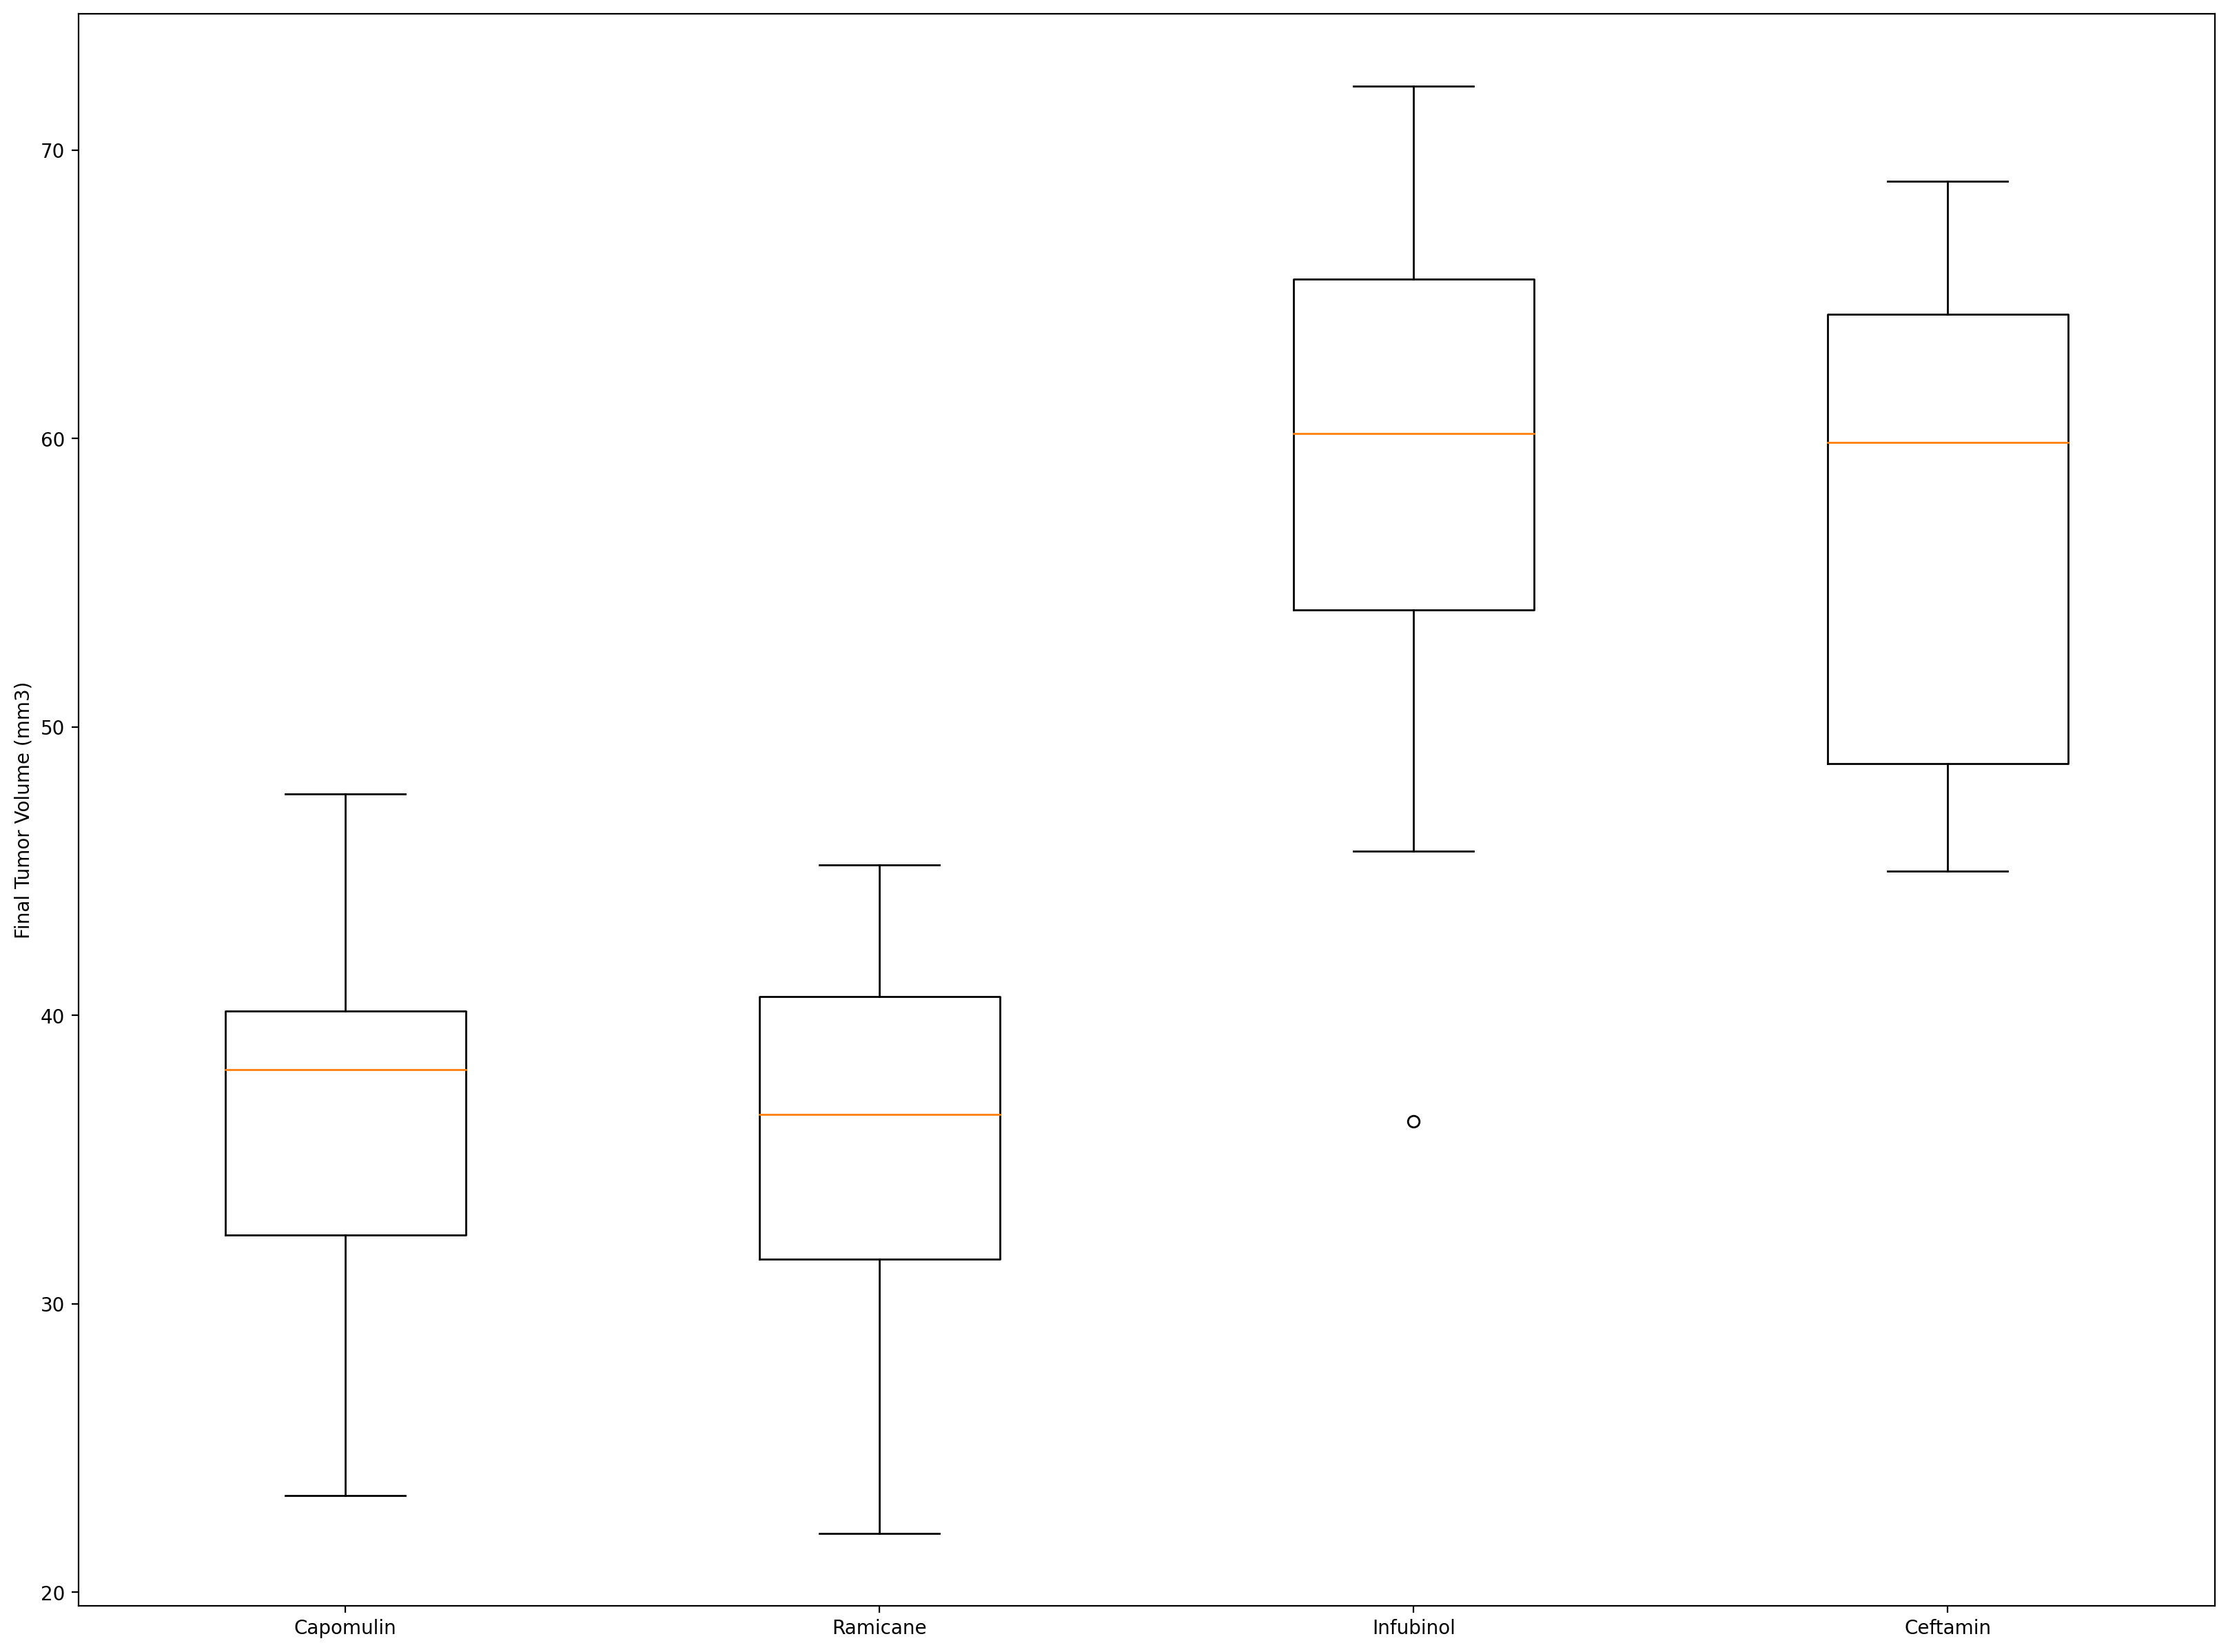

<Figure size 2000x1500 with 0 Axes>

In [17]:

regimen_cap = id_outliers("Capomulin")
regimen_ram= id_outliers("Ramicane")
regimen_inf = id_outliers("Infubinol")
regimen_cef = id_outliers("Ceftamin")

plt.boxplot([regimen_cap,regimen_ram,regimen_inf,regimen_cef],labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()
plt.savefig("../05_box_chart.png")

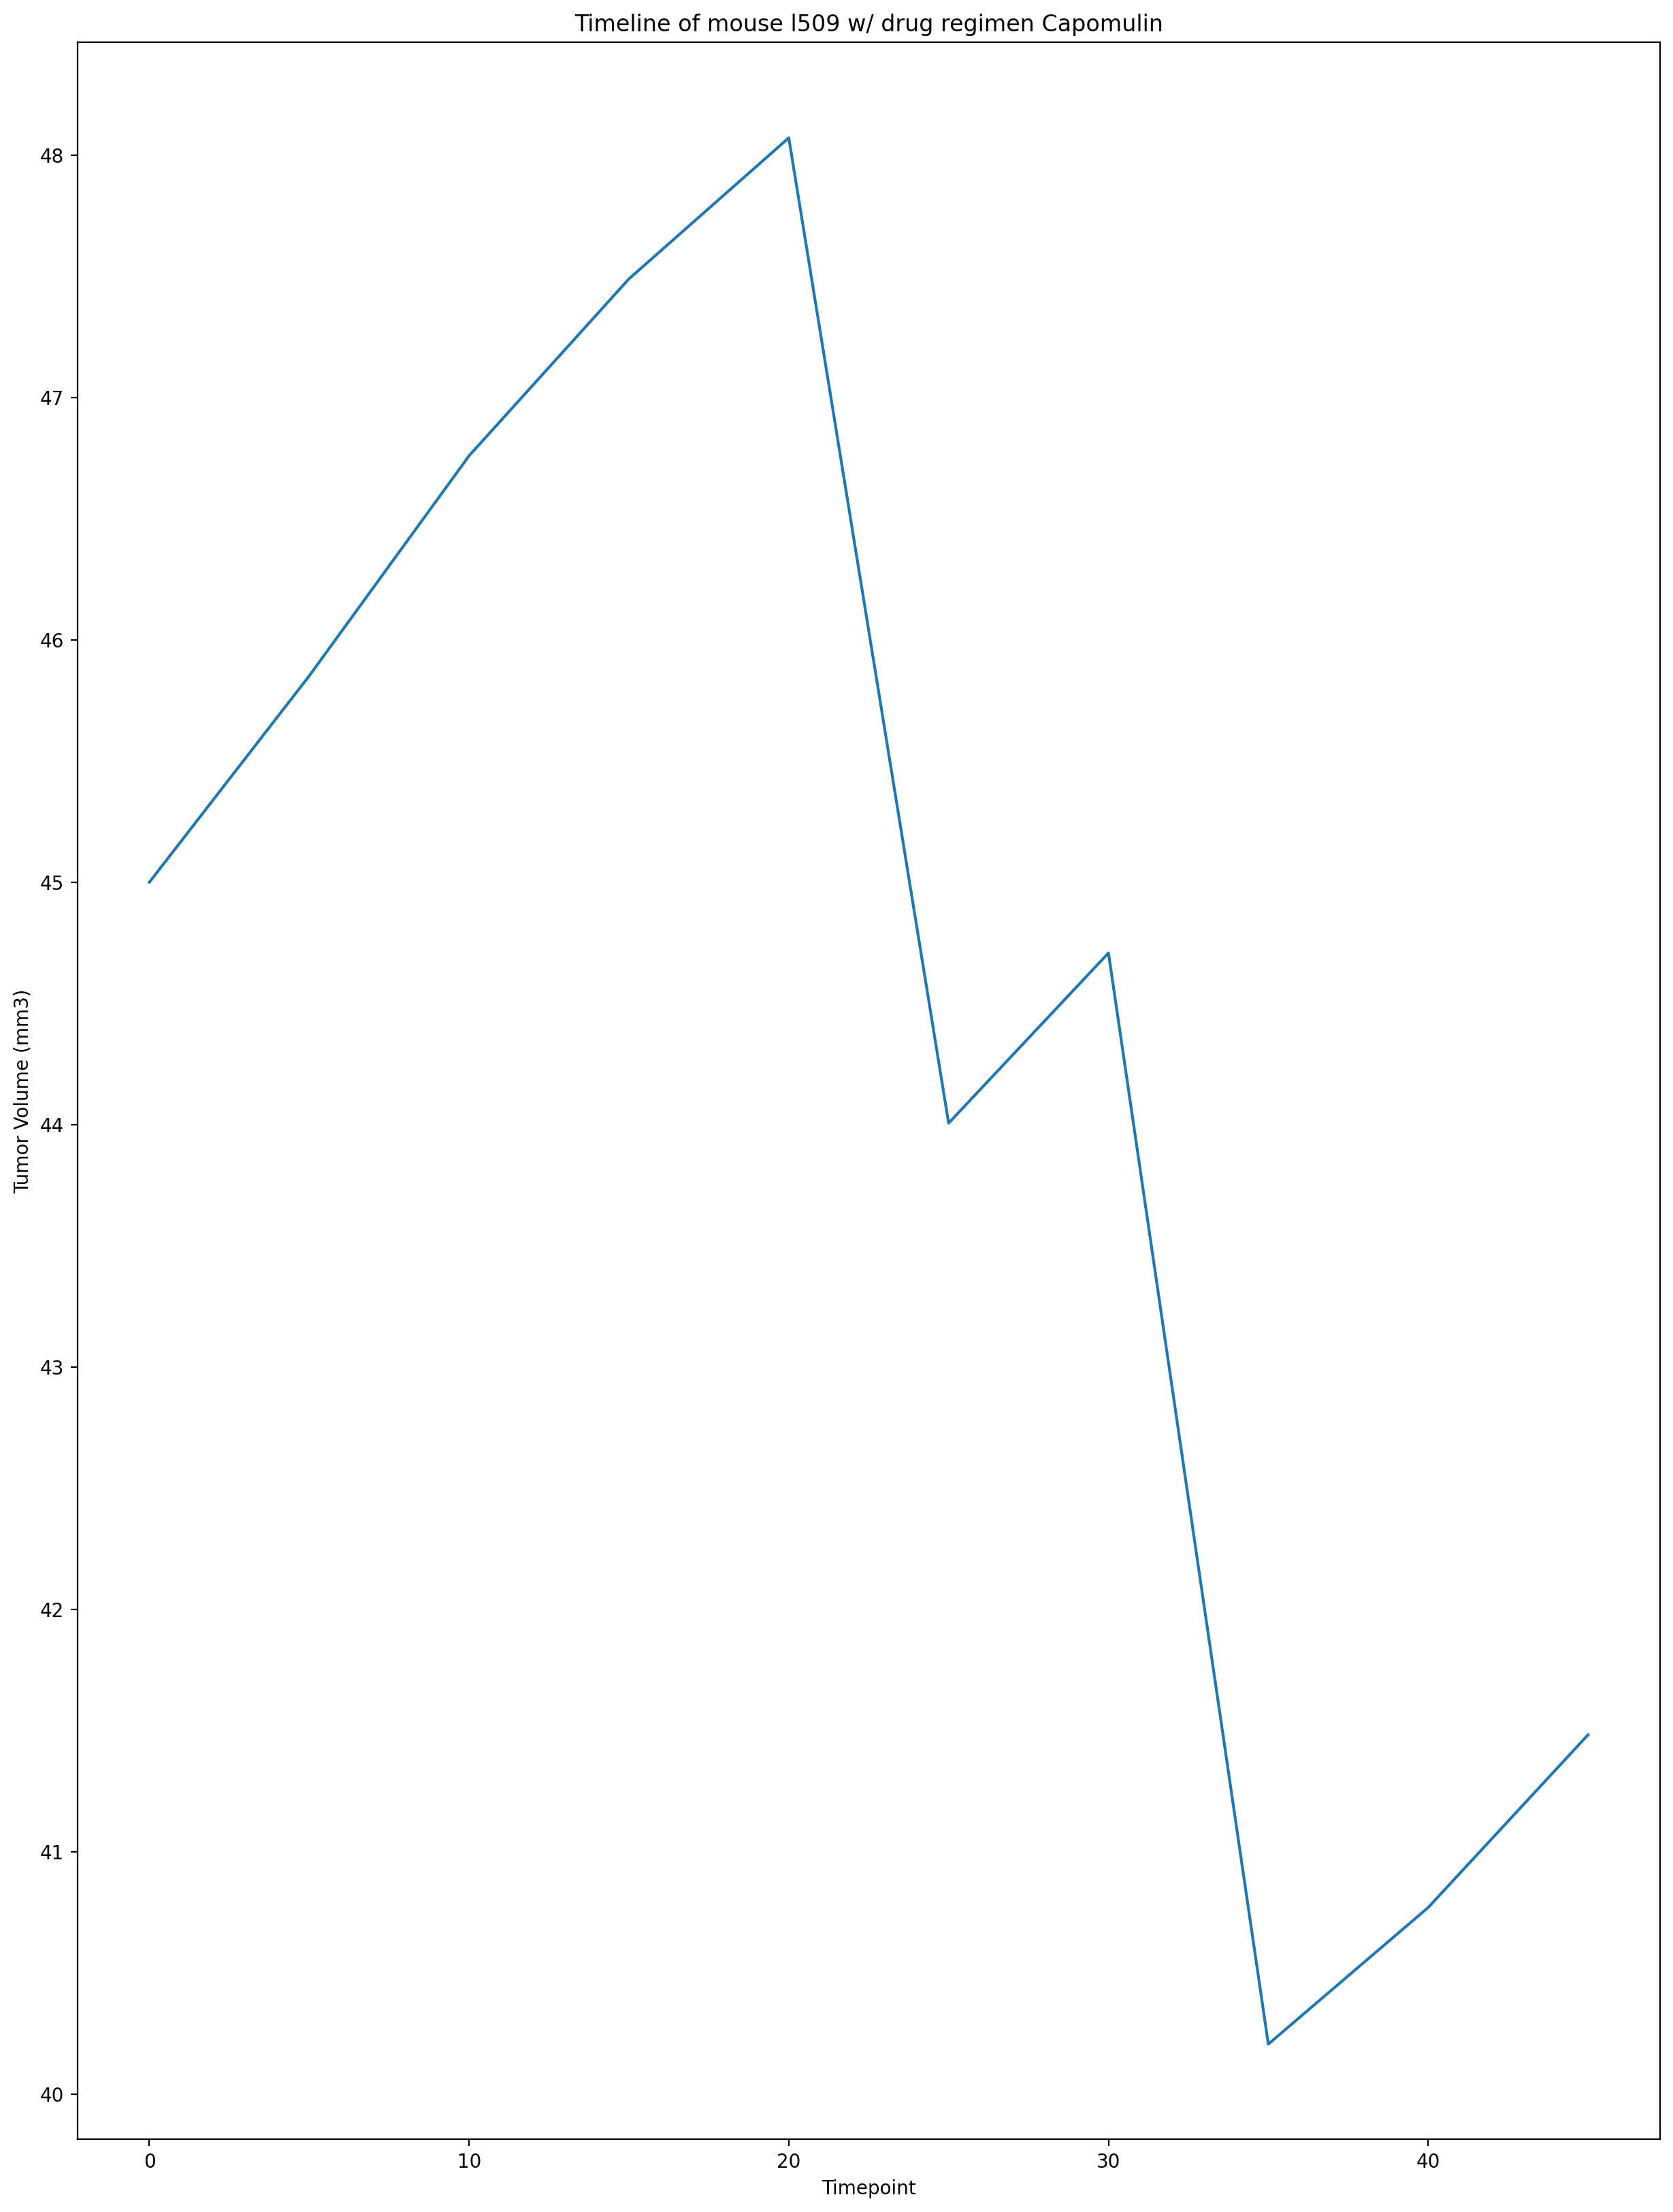

In [18]:

mouse_treatment =mouse_study_merge[mouse_study_merge["Mouse ID"].isin(["l509"])]

del mouse_treatment["Metastatic Sites"],mouse_treatment["Sex"],mouse_treatment["Age_months"],mouse_treatment["Weight (g)"], mouse_treatment["Drug Regimen"], mouse_treatment["Mouse ID"]

mouse_treatment
plt.figure(figsize=(15,20))
plt.plot(mouse_treatment["Timepoint"],mouse_treatment["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timeline of mouse l509 w/ drug regimen Capomulin")
plt.savefig("../06_line_chart_timepoint_tumor.png")

<function matplotlib.pyplot.show(close=None, block=None)>

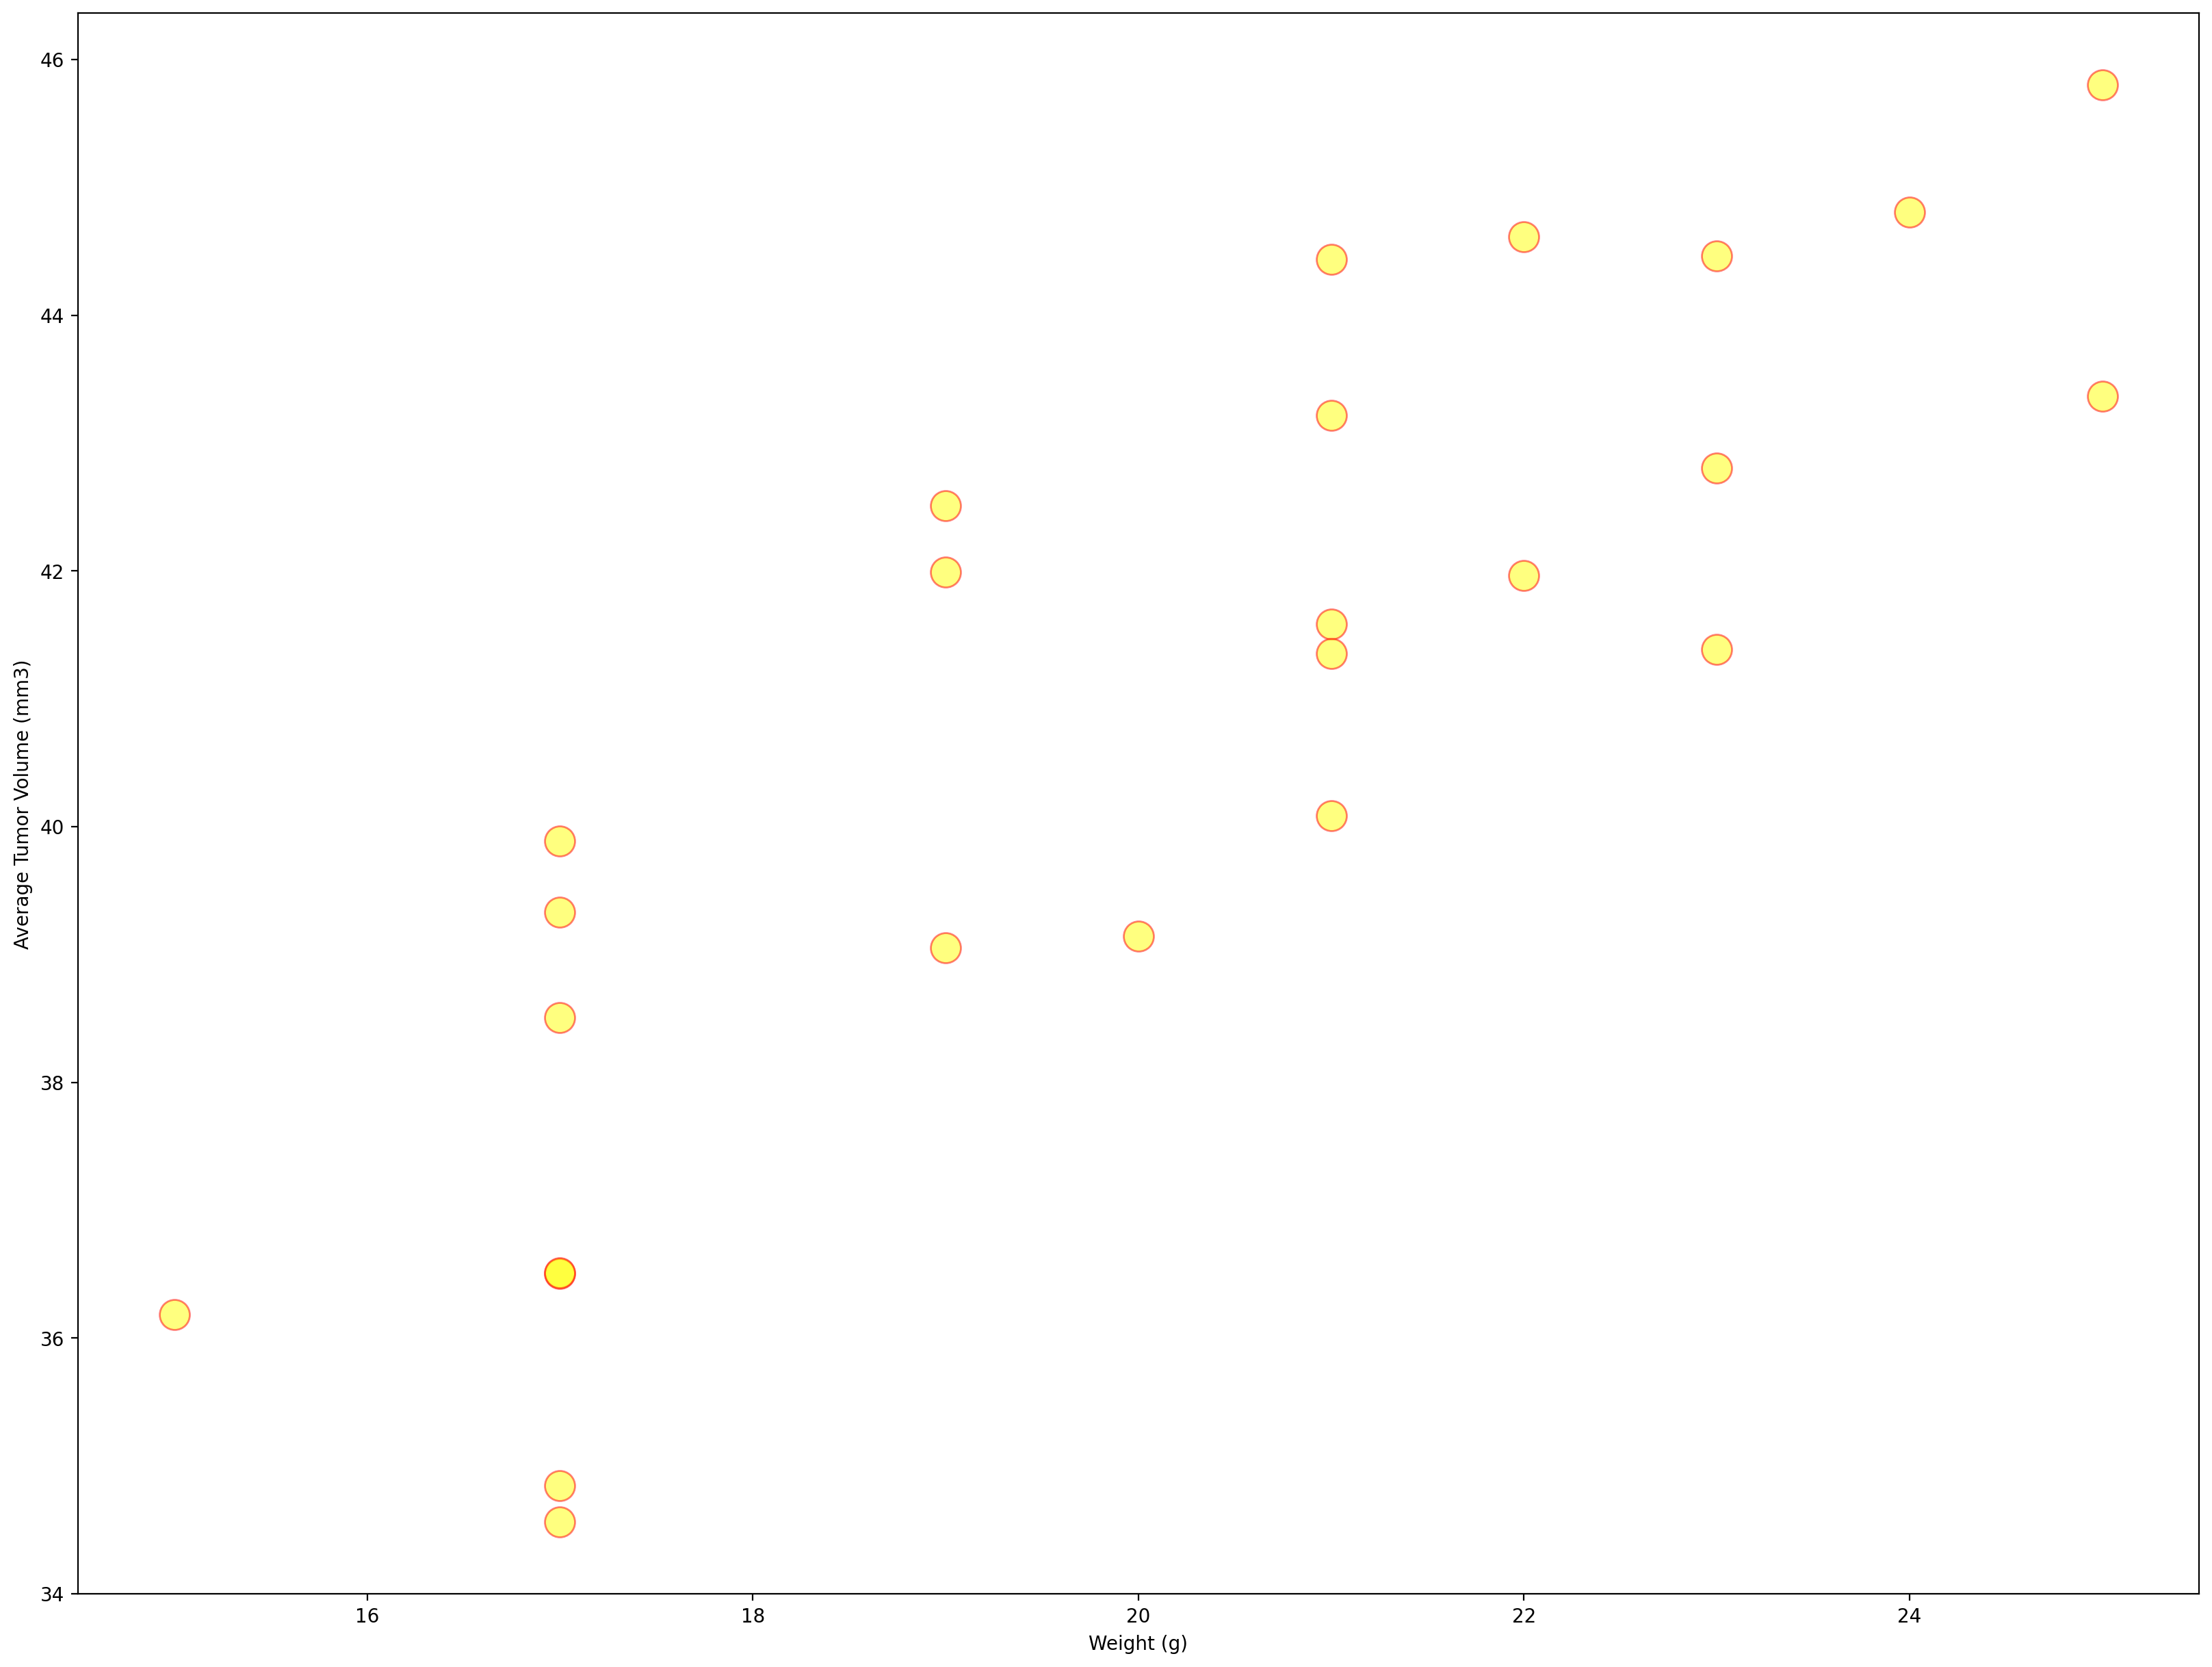

In [19]:

drug_treatment_cap =mouse_study_merge[mouse_study_merge["Drug Regimen"].isin(["Capomulin"])]

del drug_treatment_cap["Timepoint"], drug_treatment_cap["Metastatic Sites"],drug_treatment_cap["Drug Regimen"], drug_treatment_cap["Sex"], drug_treatment_cap["Age_months"],

avg_tumor_weight=drug_treatment_cap.groupby(["Mouse ID"]).mean()

plt.scatter(avg_tumor_weight["Weight (g)"],avg_tumor_weight["Tumor Volume (mm3)"], marker="o",facecolors="yellow",edgecolors="red",alpha=0.5,s=250)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show

The correlation between mouse weight and the average tumor volume is 0.84


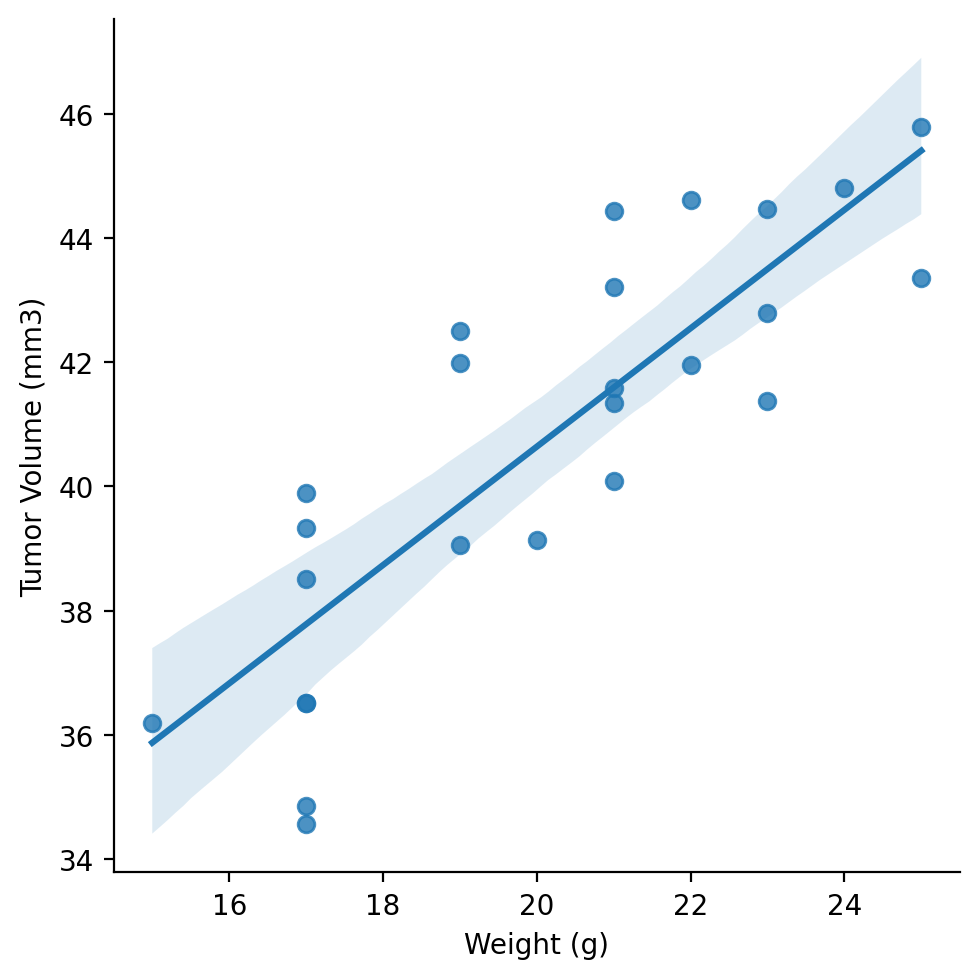

<Figure size 2000x1500 with 0 Axes>

In [20]:

coeff_plot = sns.lmplot(x="Weight (g)",y="Tumor Volume (mm3)", data=avg_tumor_weight)

p_correlation, p_value= st.pearsonr(avg_tumor_weight["Weight (g)"],avg_tumor_weight["Tumor Volume (mm3)"])

print(f'The correlation between mouse weight and the average tumor volume is {round(p_correlation,2)}')

plt.show()
plt.savefig("../07_scatter_plot.png")